In [1]:
#! pip install kaggle

In [2]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

In [3]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# ! kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

In [5]:
# ! unzip zomato-bangalore-restaurants.zip

Installing requied Packages


In [6]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion,make_pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler,MinMaxScaler,   OrdinalEncoder, OneHotEncoder
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from category_encoders import TargetEncoder,LeaveOneOutEncoder, WOEEncoder, BinaryEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
import lightgbm as lgb
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [10]:
import re
re.findall(r'[\w]+@[\w]+.\w{2,}','se.a@gds.ey.com')
#re.findall()         

['a@gds.ey']

In [2]:
df = pd.read_csv('./archive/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
from collections import Counter
my_counter = Counter()
for word in df['address'].values:
    my_counter.update(word.split())

In [16]:
df['address'].str.split().apply(len).value_counts()

9     7158
10    6910
8     6708
11    5947
7     5041
12    4962
13    3625
6     3339
14    2145
15    1545
5     1251
16     910
4      846
17     425
18     243
2      220
19     157
3      152
20      64
21      18
26      18
1       16
22       6
39       5
24       5
23       1
Name: address, dtype: int64

## **Data Preparation and Cleaning**

In [9]:
print(df.shape)
print(df.dtypes)

(51717, 17)
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Data seems to have some missing values in few of the columns like rate, phone, rest_type etc. Lets understand the percentage of missing values in those columns

In [11]:
#Renaming some of the columns
df = df.rename(columns={'rate':'rating','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
#Calculating missing percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

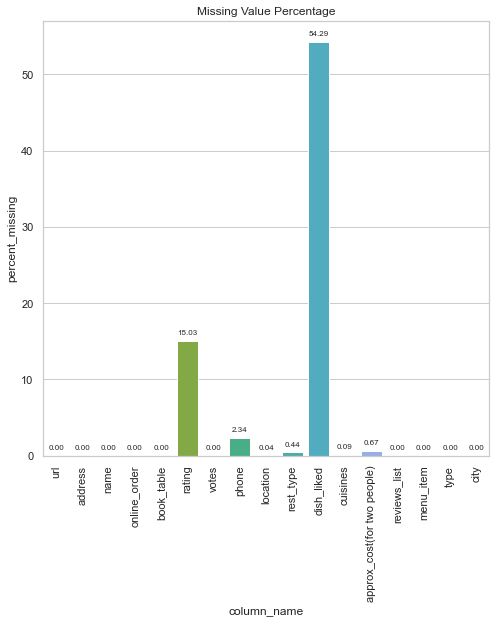

In [12]:
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid", color_codes=True)
plots = sns.barplot(x = 'column_name', y = 'percent_missing', data=missing_value_df)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Missing Value Percentage")
plt.xticks(rotation = 90)
plt.show()

Plot shows column dish_like has more than 50% missing values and rating  contains close to 15%. We will do some more analysis on the rating column, since our final goal is to predict the rating.

In [13]:
#Extracting only the rating part 
df['rating'] = df['rating'].apply(lambda x: str(x).split('/')[0])
print(df['rating'].unique())
print(df['approx_cost(for two people)'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 'NEW' '2.9' '3.5' 'nan' '2.6' '3.8 ' '3.4' '4.5' '2.5'
 '2.7' '4.7' '2.4' '2.2' '2.3' '3.4 ' '-' '3.6 ' '4.8' '3.9 ' '4.2 '
 '4.0 ' '4.1 ' '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 '
 '3.2 ' '2.6 ' '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 '
 '3.0 ' '4.8 ' '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']
['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']


rating column contains values such as 'NEW', which is for new restaurants and '-'. We will remove these records along with nan.
approx_cost(for two people) column contains some values are with comma, hence this is considered as object, we will convert it back to float.
 Also delete Unnnecessary Columns  "phone", "url". 

# Data Preprocessing and Cleaning 

In [14]:
#Data clean up
df = df[~df['rating'].isin(['NEW','-'])].drop(['url','phone','dish_liked'],axis=1).dropna() 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: str(x).replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df['rating'] = df['rating'].astype(float)
df['cuisines'] = df['cuisines'].apply(lambda x: ','.join(sorted(x.split(','))))
#df['dish_liked'] = df['dish_liked'].apply(lambda x: ','.join(sorted(x.split(','))))
df['target'] = np.where(df.rating>=df.rating.mean(), "Sucess", "Failue")
#Check for dupliacte records and delete if any
df.duplicated().sum()#35 records are duplicated
df.drop_duplicates(inplace=True)

# Exploratary Data Analysis 

In [15]:
df.name.nunique()

8385

In [16]:
print(df.name.unique())
df.loc[df['name'] == "Jalsa", ].sort_values(by = 'location', axis = 0)

['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']


,address,name,online_order,book_table,rating,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,type,city,target
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Sucess
456,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Banashankari,Sucess
559,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Banashankari,Sucess
2488,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Basavanagudi,Sucess
2966,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Basavanagudi,Sucess
3462,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,804,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n Super ambience\nGreat...",[],Dine-out,Basavanagudi,Sucess
19401,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Jayanagar,Sucess
20399,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Jayanagar,Sucess
21302,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Chinese, Mughlai,North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Jayanagar,Sucess
7607,"25/7, Doddannakundi, Outer Ring Road, Mahadeva...",Jalsa,Yes,Yes,4.2,2173,Marathahalli,Casual Dining,"Mughlai,North Indian",1500.0,"[('Rated 4.0', 'RATED\n A pretty decent place...",[],Delivery,Brookefield,Sucess


In [17]:
df.loc[df['name'] == "nu.tree", ].sort_values(by = 'location', axis = 0)

,address,name,online_order,book_table,rating,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,type,city,target
13903,"47/7 First floor, DoddaThogur Road, Near Velan...",nu.tree,No,No,NaN,0,Electronic City,Casual Dining,"Beverages, Healthy Food,North Indian",400.0,[],[],Delivery,Electronic City,Failue
3812,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,278,Sarjapur Road,Delivery,"Beverages, Healthy Food,North Indian",400.0,"[('Rated 4.0', 'RATED\n I ordered their veg m...",[],Delivery,Bellandur,Sucess
16258,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,280,Sarjapur Road,Delivery,"Beverages, Healthy Food,North Indian",400.0,"[('Rated 4.0', 'RATED\n One of those budget r...",[],Delivery,HSR,Sucess
48901,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.3,300,Sarjapur Road,Delivery,"Beverages, Healthy Food,North Indian",400.0,"[('Rated 3.0', 'RATED\n Decreasing my rating ...",[],Delivery,Sarjapur Road,Sucess
7110,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,170,Whitefield,"Quick Bites, Beverage Shop","Beverages, Healthy Food,North Indian",400.0,"[('Rated 5.0', 'RATED\n This is second time I...","['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Delivery,Brookefield,Sucess
40984,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,178,Whitefield,"Quick Bites, Beverage Shop","Beverages, Healthy Food,North Indian",400.0,"[('Rated 5.0', 'RATED\n This is second time I...","['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Delivery,Marathahalli,Sucess
50269,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,185,Whitefield,"Quick Bites, Beverage Shop","Beverages, Healthy Food,North Indian",400.0,"[('Rated 5.0', 'RATED\n This is second time I...",[],Delivery,Whitefield,Sucess
51376,"12th Floor, Gamma Building, Sigma Soft Tech Pa...",nu.tree,Yes,No,4.2,52,Whitefield,Quick Bites,"Beverages, Healthy Food,North Indian",400.0,"[('Rated 5.0', 'RATED\n Palak is my favourite...",[],Dine-out,Whitefield,Sucess


We have total of 8385 restaurants listed in Zomato Bangalore.
Restaurant 'nu.tree' is situated in 3 locations.  
Every outlet of this restaurant for a specific location is having a seperate  entry based on the features restaurant have such as Dine-out, Buffet & Delivery.

ie, We can have multiple records for the same restaurant in the dataset.


In [18]:
# pr_report = df.profile_report(
#     sort=None, html={"style": {"full_width": True}}, progress_bar=False
# )
# pr_report.to_file("eda.html")

**Univarate Analysis**

We will start with Univarate analysis on important columns such as name,  'online_order', 'book_table', 'rating', 'votes',
 'rest_type', 'cuisines', 'approx_cost(for two people)' etc

In [19]:
df.dropna(inplace=True)
class_dist = pd.DataFrame(df['target'].value_counts(normalize=True))
class_dist['target'] = class_dist['target']*100

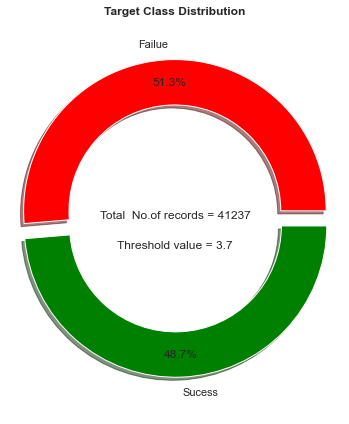

In [20]:
colors = ['red','green']
# explosion
explode = (0.05, 0.05)
  
fig1, ax1 = plt.subplots()
# Pie Chart

ax1.pie(class_dist['target'].values, colors=colors, labels=class_dist.index,
        autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3),shadow=True,
        explode=explode)
sumstr = 'Total  No.of records = '+str(df.shape[0])
fig1.subplots_adjust(top=1.5) 
# String on the donut center
ax1.text(0., 0., sumstr, horizontalalignment='center')
ax1.text(0., -0.2, 'Threshold value = '+str(round(df.rating.mean(),2)), horizontalalignment='center')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Target Class Distribution',fontweight='bold')
plt.show()
  


We can see our dataset is well balanced. A 50-50 class distribution is observed across 40k records. Inorder classify the sucess/failure of a restuarant, threshold value of 3.7 is taken

Create Dataframe which contains Top 10 Cuisines, Restaurants, Location, Restuarant types

In [21]:
df['cuisines'] = df['cuisines'].apply(lambda x: ','.join(sorted(x.split(','))))

In [22]:
top_cuisine = df['cuisines'].value_counts()[:10].rename_axis('cuisines').reset_index(name='counts')
top_rest = df['name'].value_counts()[:10].rename_axis('name').reset_index(name='counts')
top_loc = df['location'].value_counts()[:10].rename_axis('location').reset_index(name='counts')
top_types = df['rest_type'].value_counts()[:10].rename_axis('rest_type').reset_index(name='counts')

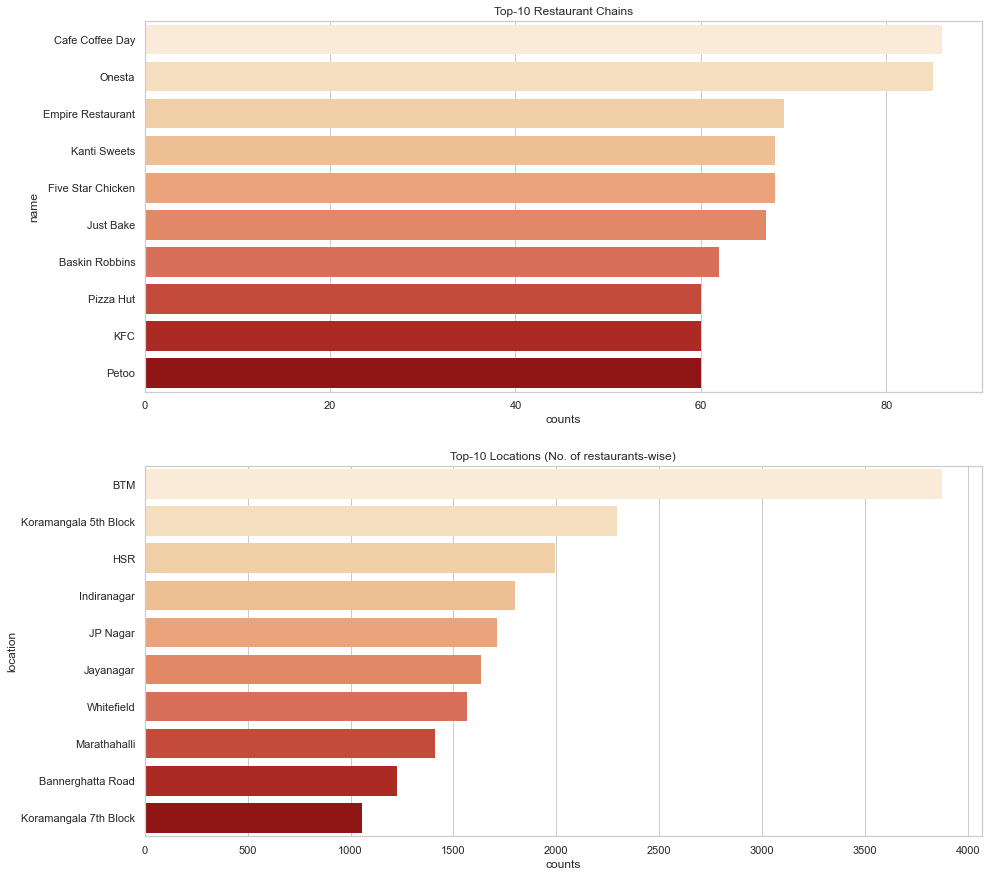

<Figure size 576x576 with 0 Axes>

In [23]:
fig, axes = plt.subplots(2, 1,figsize=(15,15))
plt.figure(figsize=(8, 8))
axes = axes.flatten()
ax1 = sns.barplot(x='counts', y='name', data=top_rest,  orient='h', ax=axes[0], palette='OrRd', lw=0)
#ax2 = sns.barplot(x='counts', y='cuisines', data=top_cuisine,  orient='h', ax=axes[1], palette='OrRd', lw=0)
ax3 = sns.barplot(x='counts', y='location', data=top_loc,  orient='h', ax=axes[1], palette='OrRd', lw=0)
ax1.title.set_text('Top-10 Restaurant Chains')
#ax2.title.set_text('Top-10 Cuisines (No. of restaurants-wise)')
ax3.title.set_text('Top-10 Locations (No. of restaurants-wise)')
#ax4.title.set_text('Fourth Plot')

In the above graph, we can see top-10 famous restaurants, top 10 cuisines and  top 10 locations in Bengaluru based on the number of restaurants.

We can see that Onesta the most popular restaurant chains in Bangalore. 
Bnaglaore being the HUB for IT, Location such as BTM ,house to many medium-to-small educational institutes companies are found in these localities. Data shows BTM, Koranmangala locations have most number of restaurants. 

Lets check the percentage compostion of no of restauranst in these laocations

https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

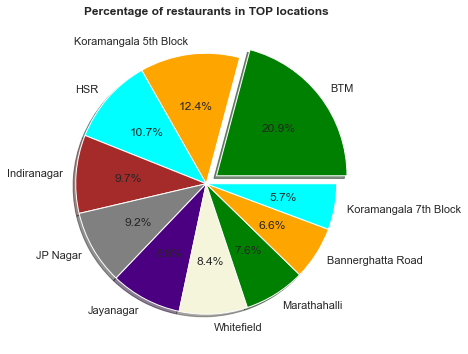

In [24]:
plt.figure(figsize = (12,6))
colors = ("green","orange", "cyan", "brown",
          "grey", "indigo", "beige")
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
plt.pie(top_loc['counts'], explode=explode, labels=top_loc['location'], colors=colors,autopct='%1.1f%%', shadow=True,)
plt.title("Percentage of restaurants in TOP locations", weight = 'bold')
  
# show plot
plt.show()

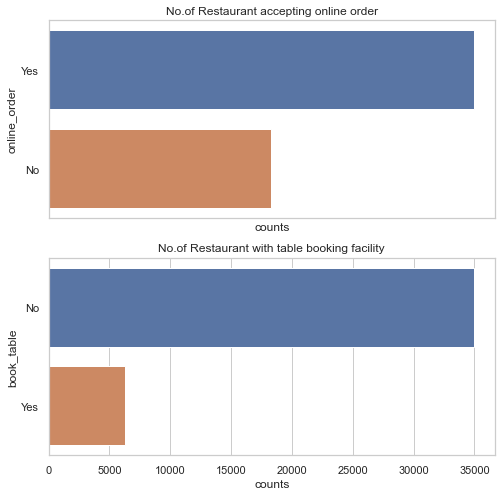

<Figure size 576x576 with 0 Axes>

In [25]:
online_df = df['online_order'].value_counts().rename_axis('online_order').reset_index(name='counts')
book_df = df['book_table'].value_counts().rename_axis('book_table').reset_index(name='counts')
fig, axes = plt.subplots(2, 1,figsize=(8,8))
plt.figure(figsize=(8, 8))
axes = axes.flatten()
ax1 = sns.barplot(x='counts', y='online_order', data=online_df,  orient='h', ax=axes[0])
ax2 = sns.barplot(x='counts', y='book_table', data=book_df,  orient='h', ax=axes[1])
ax1.title.set_text('No.of Restaurant accepting online order')
ax1.set_xticks([])
ax2.title.set_text('No.of Restaurant with table booking facility')

We see that majority of the restaurants(15,000+) have online ordering facility. But most of the restaurants dont have table booking facility.

**Multivarate Analysis**

Multivariate analysis deals with the statistical analysis of data collected on more than one dependent variable.


Text(0.5, 0.98, 'Target vs Book table vs Online Order')

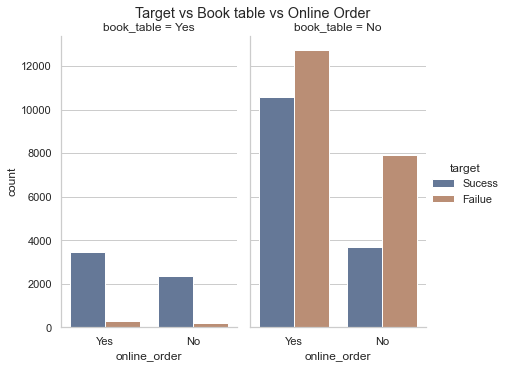

In [26]:
g = sns.catplot(x="online_order",col='book_table',
                data=df, saturation=.5,hue='target',
                kind="count", ci=None, aspect=.6)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("Target vs Book table vs Online Order")

Restaurants with table booking option tends to be more sucessful even if the restaurant doesnt provide online order
 However, the sucess rate for the restaurants with no table booking option and online ordering service was observed to ve low. Even if restauarnst provide online ordering service, success is not guranteed 


Text(0.5, 0.98, 'approx_cost vs Book table vs Online Order')

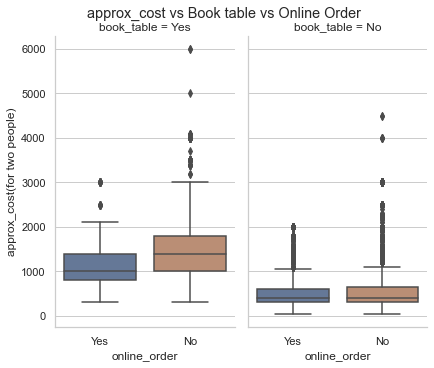

In [27]:
g = sns.catplot(x="online_order", y="approx_cost(for two people)",col='book_table',
                data=df, saturation=.5,
                kind="box", ci=None, aspect=.6)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("approx_cost vs Book table vs Online Order")

Approx Cost of the food for two persons is higher for the restaurants with table booking option and with/without online orders.

Restaurants with table booking facility, do not accept orders online have higher food cost per 2 persons.

Text(0.5, 0.98, 'Target vs Book table vs Online Order')

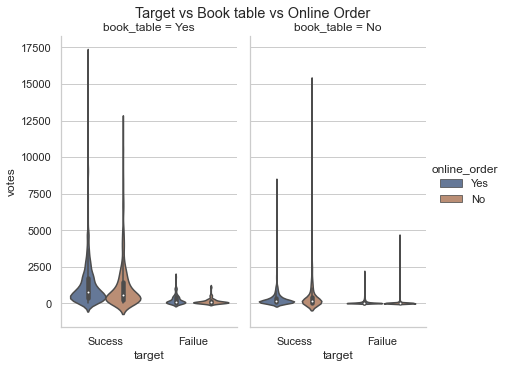

In [28]:
g = sns.catplot(x="target",y="votes",col='book_table',
                data=df, saturation=.5,hue='online_order',
                kind="violin", ci=None, aspect=.6)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("Target vs Book table vs Online Order")

 No. of votes will increase as more customers visit the restaurant. Above plot shows as the number of vote increase restaurant is tend to be a successful one.

Restaurants with book table option available and online order option which is having the Highest vote and eventually resulting in Success.

Table booking and online ordering does not always tend to be successfull

In [29]:
sucess_rate_loc = df[df['location'].isin(top_loc.location)]\
        .groupby(['location','target']).size()\
        .reset_index(name="count")
sucess_rate_loc['perc'] = sucess_rate_loc.groupby('location')['count'].apply(lambda x: x*100/x.sum())

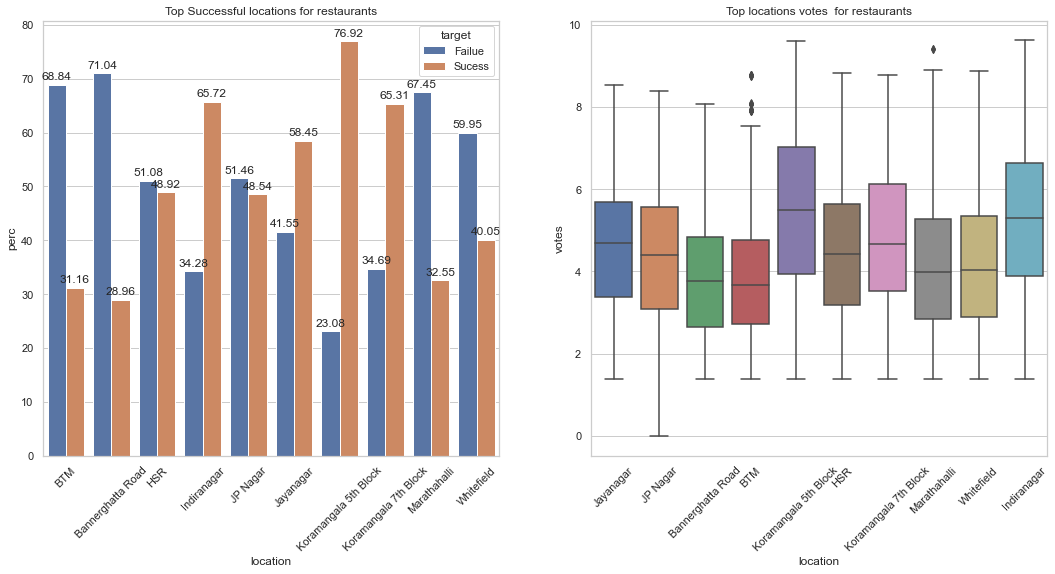

In [30]:
fig, axes = plt.subplots(1, 2,figsize=(18,8))
axes = axes.flatten()
#Subset of the data based on top 10 loactions based on retaurant count
ax2 = sns.barplot(x = 'location', y = 'perc',hue='target', ax=axes[0], data = sucess_rate_loc)
#Here im scaling the vote column by taking log(votes) so that i can plot in a single plot and make inferences
ax3 = sns.boxplot(x = 'location', y = np.log(df['votes']), ax=axes[1], data = df[df['location'].isin(top_loc.location.values)])
for bar in ax2.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
# /plt.xlabel('Locations')
# plt.ylabel('rating')
ax2.title.set_text('Top Successful locations for restaurants')
ax3.title.set_text('Top locations votes  for restaurants')

Bannerghatta BTM location is having the highes failure rate. Box plot also confirms the same, restuarants in these loactions are voted less.
Koramangala whihc is one of the highly voted location, is having the high success rate for a restaurant. Approx 78% success rate is there for this location.
****************************************************************

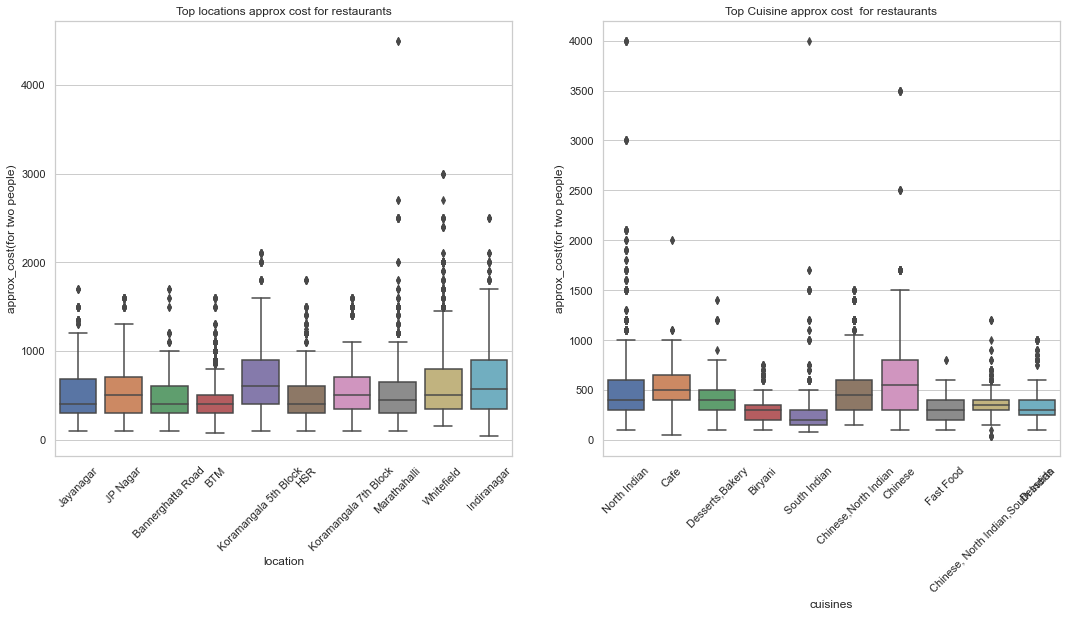

In [31]:
fig, axes = plt.subplots(1, 2,figsize=(18,8))
axes = axes.flatten()
#Subset of the data based on top 10 loactions based on retaurant count
ax2 = sns.boxplot(x = 'location', y = 'approx_cost(for two people)', ax=axes[0], data = df[df['location'].isin(top_loc.location.values)])
ax3 = sns.boxplot(x = 'cuisines', y = 'approx_cost(for two people)', ax=axes[1], data = df[df['cuisines'].isin(top_cuisine.cuisines.values)])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
# /plt.xlabel('Locations')
# plt.ylabel('rating')
ax2.title.set_text('Top locations approx cost for restaurants')
ax3.title.set_text('Top Cuisine approx cost  for restaurants')

 Indira nagar which is cosmopolitan locality, and is one of the most expensive neighbourhoods in Bangalore, constitute for few of the premium restaurants in bangalore. We can see most of the budget friendly restauranats are situated in BTM locality.

 Coming to the cuisines offered in restuarants, chineese cuisine are more expensive, and  we can see few outliers across the data. Those are due to the few premeium restaurants like  Alba - JW Marriott, Riwaz - The Ritz-Carlton,The Lantern Restaurant etc

Percentage of Restaurants in TOP 10 Location which accepts online order and Table booking Option

In [32]:
location_online = df[df['location'].isin(top_loc.location.values)]\
             .groupby(['location', 'online_order'])['location'].count().reset_index(name="count")
location_online['perc'] = location_online.groupby('location')['count'].apply(lambda x: x*100/x.sum())

table_online  = df[df['location'].isin(top_loc.location.values)]\
             .groupby(['location', 'book_table'])['location'].count().reset_index(name="count")
table_online['perc'] = table_online.groupby('location')['count'].apply(lambda x: x*100/x.sum())

Text(0.5, 0.98, '% of Restaurants accepting online order in Top locations')

<Figure size 1080x288 with 0 Axes>

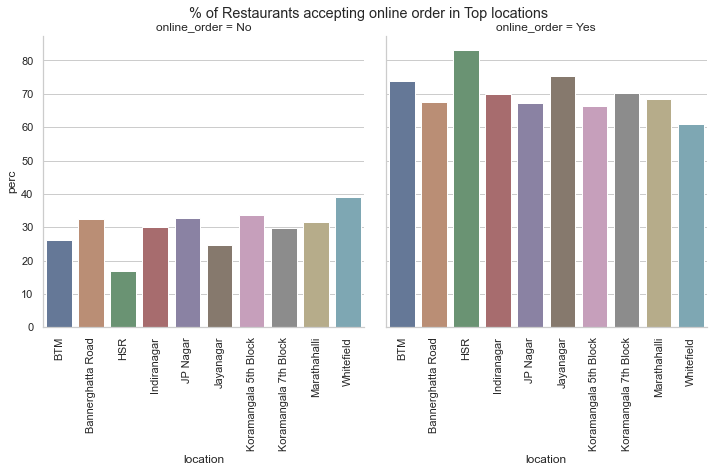

In [33]:
plt.figure(figsize=(15, 4))
g = sns.catplot(x="location", y="perc",col='online_order',
                data=location_online, saturation=.5,
                kind="bar")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("% of Restaurants accepting online order in Top locations")

More than 50% of restauranst in Top location accepts online orders. HSR is having highest percentage of restaurants. 

Whitefield is having more restauranst which dont have online facility.

Text(0.5, 0.98, '% of Restaurants with table book option in Top locations')

<Figure size 1080x288 with 0 Axes>

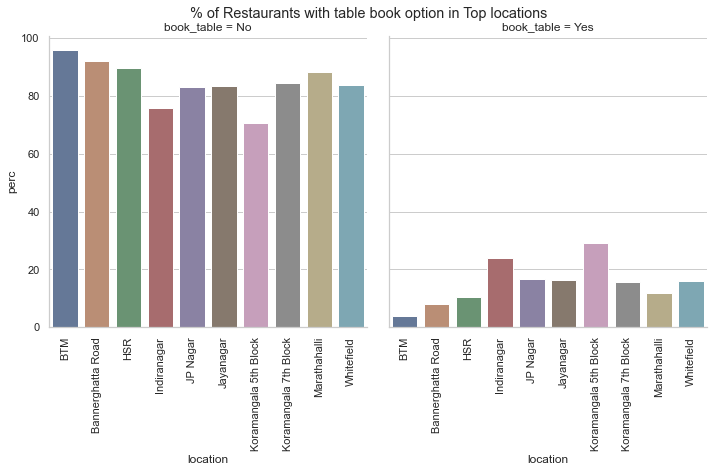

In [34]:
plt.figure(figsize=(15, 4))
g = sns.catplot(x="location", y="perc",col='book_table',
                data=table_online, saturation=.5,
                kind="bar")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("% of Restaurants with table book option in Top locations")

95% of restaurants in the top-10 laocations do not have option to reserve the tables. Few restaurants in these location provide facility of booking tables. Indiranagar, place for premeuim  restaurants, may be one of the reason for high % of restaurants which provides table booking option. 

In [35]:
top_cuisine

,cuisines,counts
0,North Indian,2107
1,"Chinese,North Indian",1949
2,South Indian,1231
3,Cafe,620
4,"Desserts,Bakery",613
5,"Chinese, North Indian,South Indian",607
6,Biryani,600
7,Desserts,545
8,Fast Food,513
9,Chinese,409


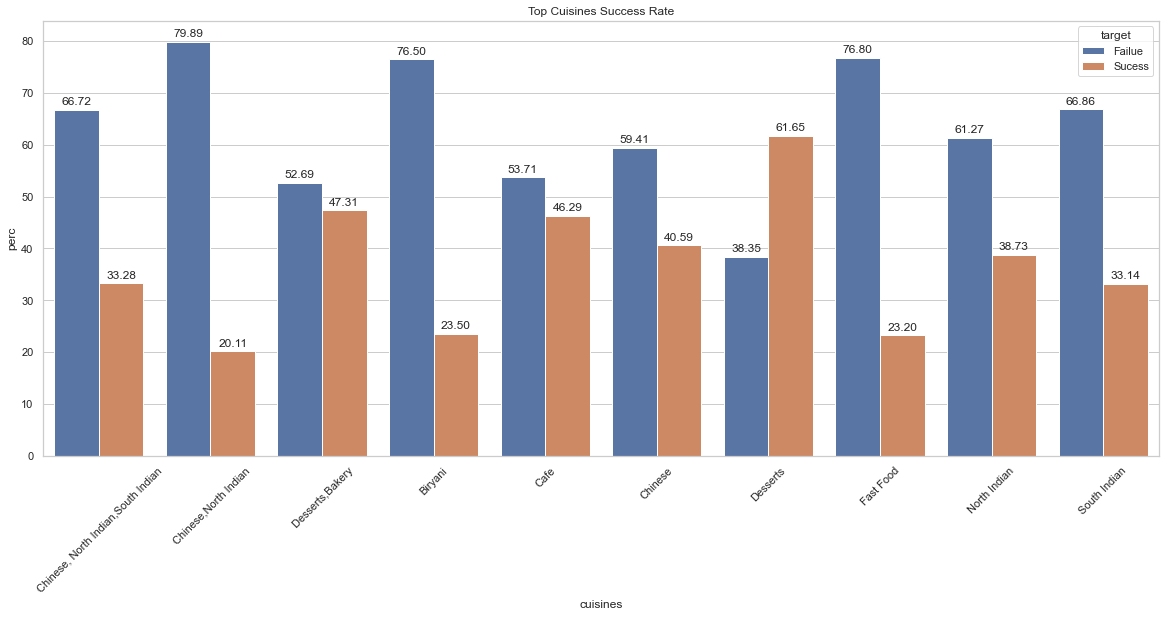

In [36]:
success_rate_cui = df[df['cuisines'].isin(top_cuisine.cuisines)]\
        .groupby(['cuisines','target']).size()\
        .reset_index(name="count")
success_rate_cui['perc'] = success_rate_cui.groupby('cuisines')['count'].apply(lambda x: x*100/x.sum())
plt.figure(figsize = (20,8))
ax2 = sns.barplot(x = 'cuisines',y='perc',hue='target', data=success_rate_cui)
for bar in ax2.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation = 45)
plt.title("Top Cuisines Success Rate")
plt.show()

Plot shows restaurants with cuisines like Deserts are having a high success aret, whereas chinese/north indian cuisine which is the second highest cuisine is having highest failure chances.

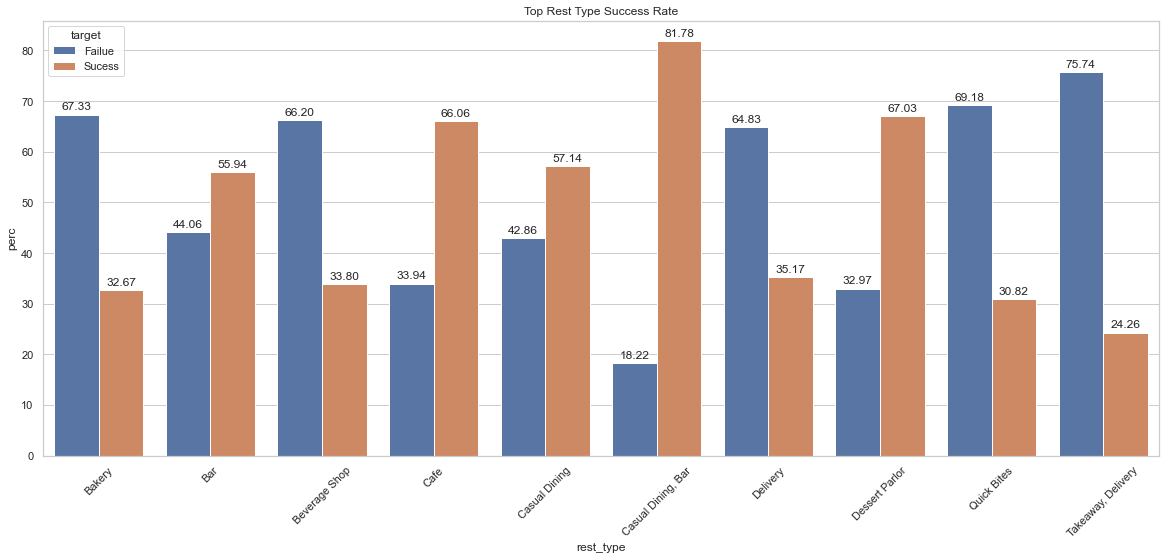

In [37]:
success_rate_type= df[df['rest_type'].isin(top_types.rest_type)]\
        .groupby(['rest_type','target']).size()\
        .reset_index(name="count")
success_rate_type['perc'] = success_rate_type.groupby('rest_type')['count'].apply(lambda x: x*100/x.sum())
plt.figure(figsize = (20,8))
ax2 = sns.barplot(x = 'rest_type',y='perc',hue='target', data=success_rate_type)
for bar in ax2.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation = 45)
plt.title("Top Rest Type Success Rate")
plt.show()

Some of the restaurants are meant for only casual dining and some are only for bar purpose. Since Bangalore is one of the metropoitian cities with high standard of living, We can see that the restaurents which are having Drinks and casual dining are having high chances of success. Restaurants which are not provding Dien in facility are found to more failure.

**************************************************************

Create a dataframe for Top 10 locations along with each rest type count

In [38]:
rest_type_loc = df[df['location'].isin(top_loc.location)]\
        .groupby(['location','rest_type'])['name'].count()\
        .reset_index(name="count")#['count'].nlargest(3).reset_index()#.sort_values(['location','count'],ascending=False)
#taking top 3 rest type for top 10 locations
rest_type_loc = rest_type_loc.set_index('rest_type').groupby(['location'])['count'].nlargest(3).reset_index()

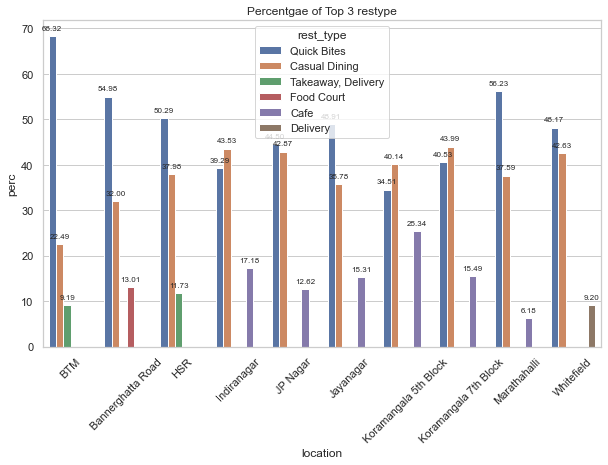

In [39]:
#taking top 3 rest type for top 10 locations
rest_type_loc['perc'] = rest_type_loc.groupby('location')['count'].apply(lambda x: x*100/x.sum())
plt.figure(figsize = (10, 6))
plots = sns.barplot(x = 'location', y = 'perc', data = rest_type_loc, hue = 'rest_type')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Percentgae of Top 3 restype")
plt.xticks(rotation = 45)
plt.show()

Restaurants which provide Casual Dining are in top position in all top-10 locations.
quick bites restaurants are next in number in all top-10 locations.

************************************************************************

Create a dataframe for Top 10 locations along with each cuisine count

In [40]:
cuisine_loc = df[df['location'].isin(top_loc.location)]\
        .groupby(['location','cuisines'])['name'].count()\
        .reset_index(name="count")#['count'].nlargest(3).reset_index()#.sort_values(['location','count'],ascending=False)
#taking top 3 cuisines for top 10 locations
cuisine_loc = cuisine_loc.set_index('cuisines').groupby(['location'])['count'].nlargest(2).reset_index()

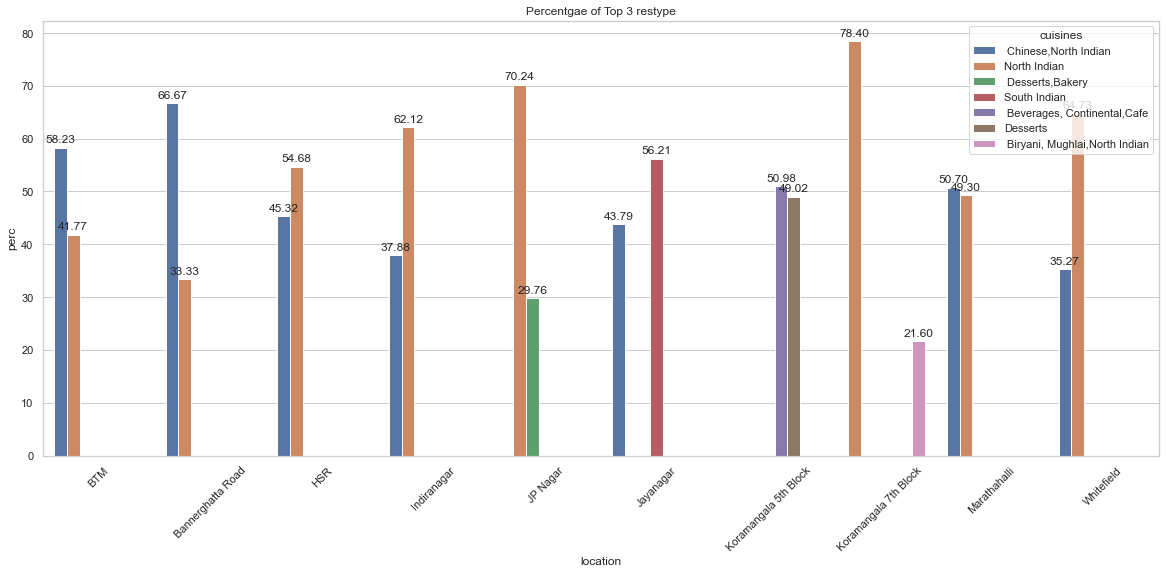

In [41]:
#taking top 3 cuisines for top 10 locations
cuisine_loc['perc'] = cuisine_loc.groupby('location')['count'].apply(lambda x: x*100/x.sum())
plt.figure(figsize = (20, 8))
plots = sns.barplot(x = 'location', y = 'perc', data = cuisine_loc, hue = 'cuisines')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Percentgae of Top 3 restype")
plt.xticks(rotation = 45)
plt.show()

Most of restaurants in locations serve North Indian cuisine food.
Also, restaurants in localities HSR road, BTM serve Chineese cuisine food.
Indiranagar , place for premeuim  restaurants, serve continenetsl cuisine food.
***************************************************************



Due to diverse food culture of india, people always like to vsit retauranst atleast once in a week. Its become more of a custom for a family to enjoy the weekend by shopping/ cinemas etc and to have to a good dinner. Bangalore, one of popular city and "IT capital of India", there are lot of working professionals who rely on restaurants. So the demand is always there in the market but inorder suceed, Approx Cost must be reasonable, and provide Online service delivery.Try to gain good reviews and rating. 

### Correlation Matrix

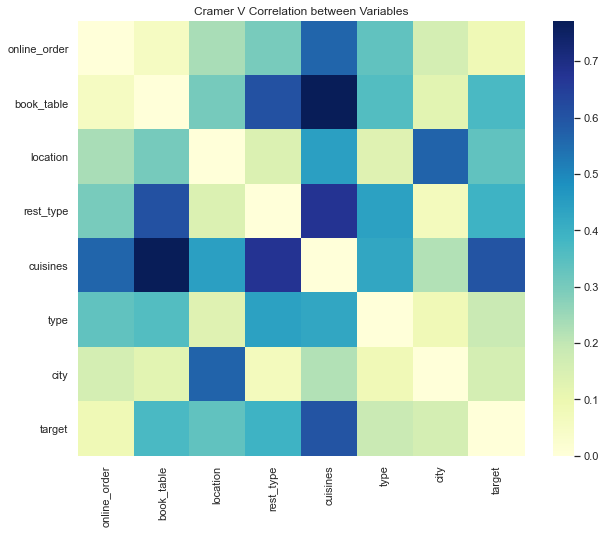

In [42]:
import itertools
import scipy.stats as ss
import itertools
from scipy.stats import norm
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
cols = ['online_order', 'book_table', 
       'location', 'rest_type', 'cuisines', 
       'type', 'city', 'target']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, ax=ax,cmap="YlGnBu"); ax.set_title("Cramer V Correlation between Variables");

As per cramers correlation coefficient our target variable  is having medium to high corr with indepent feautures such as book_table, location, rest_type and low corr with features such as type and online_order.

### Performance Metrics

Since we are solving this as a classification problem, we can see metrices such as F1 score/ Precision and Recall



### Predicting the Success of a Restaurant
Use the restaurant rate to classify our data in two classes: Success and Failure (thresholds decided based on mean value)  Create a target variable using a pre-defined rate threshold

### Some considerations:

We won't use the votes, reviews, dishes_liked feature as long as this is a information we only know after launching a restaurant. As we want to be predictive, the idea is to return the probability of success of a restaurant before launching it.


### Base Line modelling
Features : 
- online_order
- book_table
- location
- rest_type
- cuisines
- city
- approx_cost


Models : 
- Logistic Regression
- RandomForestClassifier
- XGBClassifier
- LightGBM 


In [43]:
RANDOM_SEED = 42
features = ['online_order', 'book_table',
       'location', 'rest_type',  'cuisines',
       'approx_cost(for two people)','city']
df['target_encode'] = np.where(df.target=="Sucess", 1, 0)
X = df[features]
y = df['target_encode']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=RANDOM_SEED)
num_columns_derived = ['approx_cost(for two people)']
cat_columns_derived = ['online_order', 'book_table', 
       'location', 'rest_type',  'cuisines',
       'city']
############################################################################################################################# 


#setting the pipes for the transformation 
categorical_pipe = Pipeline([('get_dummies',OneHotEncoder(handle_unknown='ignore'))])
numeric_pipe = Pipeline([('scaling',StandardScaler())])

# set up columnTransformer
col_transformer_derived = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_pipe, cat_columns_derived), ('num', numeric_pipe, num_columns_derived)
                    ],
                    remainder='passthrough',
                    n_jobs=-1
                    )


##########################################################################################################################
X_train = col_transformer_derived.fit_transform(X_train) 

In [45]:

lgbm = lgb.LGBMClassifier(random_state=RANDOM_SEED)
rf = RandomForestClassifier(random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED)
xgb = XGBClassifier(seed=RANDOM_SEED)
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED)
test_performance = {}
test_performance['model'] = []
test_performance['precision'] = []
test_performance['recall'] = []
test_performance['f1'] = []
test_performance['auc'] = []
test_performance['cv_auc'] = []
models = [lr,rf, xgb, dtree, lgbm]
names = ["Logistic Regresion", "Random Forest","Xgboost","Decision Tree","LightGBM"]
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = RANDOM_SEED)
for model, name in zip(models, names):
    cv_auc = cross_val_score(model, X_train, y_train, cv=skf,scoring='roc_auc')
    model.fit(X_train,y_train)
    y_pred = model.predict(col_transformer_derived.transform(X_test)) 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    test_performance['model'].append(name)
    test_performance['precision'].append(round(precision, 3))
    test_performance['recall'].append(round(recall, 3))
    test_performance['f1'].append(round(f1, 3))
    test_performance['auc'].append(round(auc, 3))
    test_performance['cv_auc'].append(round(np.array(cv_auc).mean(), 3))

[11:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [46]:
#Creating a DataFrame with metrics
performance_metrics = pd.DataFrame(test_performance)#.reset_index(drop=True).loc[:0, :]
performance_metrics.reset_index(drop=True).style.background_gradient(cmap='Blues')

,model,precision,recall,f1,auc,cv_auc
0,Logistic Regresion,0.837000,0.746000,0.789000,0.804000,0.879000
1,Random Forest,0.950000,0.909000,0.929000,0.932000,0.959000
2,Xgboost,0.841000,0.708000,0.769000,0.791000,0.877000
3,Decision Tree,0.951000,0.934000,0.942000,0.944000,0.927000
4,LightGBM,0.832000,0.691000,0.755000,0.780000,0.865000


### Base Line model improving
From above dataframe, Random forest classifier is having best performace metrics among the list of models we trained. Let us try to improve this model by doing some more feature engineering and hyperparametr tuning.

Features Engineered columns: 
- total_cuisines : No. of different types of cuisines. This is information can be gotten before the launching of the establishment.
- multi_type_restuarant : Is the restauarant a multi type restaurant, and total no of differnt types.

In [13]:
#Creating two new features
df['total_cuisines'] = df.cuisines.map(lambda x: [i.strip() for i in x.split(",")]).apply(len)
df['multi_type_restuarant'] = df.rest_type.map(lambda x: [i.strip() for i in x.split(",")]).apply(len)
random_state = 42
features = ['online_order', 'book_table',
       'location', 'rest_type',  'cuisines',
       'approx_cost(for two people)','city','total_cuisines','multi_type_restuarant']
X = df[features]
y = df['target_encode']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=random_state)
num_columns_derived = ['approx_cost(for two people)','total_cuisines','multi_type_restuarant']
cat_columns_derived = ['online_order', 'book_table', 
       'location', 'rest_type',  'cuisines',
       'city']
############################################################################################################################# 


#setting the pipes for the transformation 
categorical_pipe = Pipeline([('get_dummies',OneHotEncoder(handle_unknown='ignore'))])
numeric_pipe = Pipeline([('scaling',StandardScaler())])

# set up columnTransformer
col_transformer_derived = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_pipe, cat_columns_derived), ('num', numeric_pipe, num_columns_derived)
                    ],
                    remainder='passthrough',
                    n_jobs=-1
                    )


##########################################################################################################################
X_train = col_transformer_derived.fit_transform(X_train,y_train) 

#### Bayesian Hyperparameter Optimization : Hyperopt is an open-source Python library for Bayesian optimization 

Bayesian optimisation takes past evaluations into account when choosing the hyperparameter set to evaluate next. By choosing its parameter combinations in an informed way, it enables itself to focus on those areas of the parameter space that it believes will bring the most promising validation scores. This approach typically requires less iterations to get to the optimal set of hyperparameter values. Most notably because it disregards those areas of the parameter space that it believes won’t bring anything to the table.


Main components are : 
the search space to sample parameters 

an objective function

a surrogate model (TPE)

In [14]:
#Defining the search space
def rf_space():
    space_dict = {'lane': [],
                  'randomforestclassifer__n_estimators': hp.uniform(
                    'randomforestclassifer_n_estimators', 10, 1000),
                  'randomforest__max_features': hp.choice(
                    'randomforest_max_features', ['auto', 'sqrt'])}
    return space_dict
#Objective function to minimize
def rf_hyp_obective(space):
          
                # Instantiating regressors
                rf_estimator = 'randomforestclassifer__n_estimators'
                rf_max_feature = 'randomforest__max_features'
                fit = RandomForestClassifier(
                      n_estimators=int(space[rf_estimator]),
                      max_features=space[rf_max_feature],
                      n_jobs=-1,
                      random_state=RANDOM_SEED)
                auc = abs(cross_val_score(
                                    fit, X_train, y_train,
                                    scoring='roc_auc',
                                    n_jobs=-1, cv=skf
                      ).mean())
                print("auc :- ", auc)
                return {'loss': -auc, 'status': STATUS_OK}
#Evaluating for 10 trails                
trials = Trials()
rf_space_dict = rf_space()
best_rf_hyp = fmin(fn=rf_hyp_obective,
                   space=rf_space_dict,
                   algo=tpe.suggest,
                   max_evals=10,
                   trials=trials,
                   rstate=np.random.RandomState(RANDOM_SEED),
                   show_progressbar=False)

auc :-  0.9636412829710839
auc :-  0.9636614217872443
auc :-  0.9638750925737455
auc :-  0.9636228726474944
auc :-  0.963857947449533
auc :-  0.963862795507218
auc :-  0.9638413006804455
auc :-  0.9637594931867618
auc :-  0.9637408042234471
auc :-  0.9638927569284684


###### Fitting the best model

In [15]:
n_estimators = best_rf_hyp['randomforestclassifer_n_estimators']
max_features = 'auto' if(best_rf_hyp["randomforest_max_features"] == 0) else 'sqrt'
best_fit = RandomForestClassifier(
                      n_estimators=int(n_estimators),
                      max_features=max_features,
                      n_jobs=-1,
                      random_state=RANDOM_SEED)
best_fit.fit(X_train,y_train)
best_performance = {}
best_performance['model'] = []
best_performance['precision'] = []
best_performance['recall'] = []
best_performance['f1'] = []
best_performance['auc'] = []
y_pred = best_fit.predict(col_transformer_derived.transform(X_test)) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
best_performance['model'].append("Random Forest Tuned")
best_performance['precision'].append(round(precision, 3))
best_performance['recall'].append(round(recall, 3))
best_performance['f1'].append(round(f1, 3))
best_performance['auc'].append(round(auc, 3))

In [17]:
performance_metrics_tuned = pd.DataFrame(best_performance)
performance_metrics = pd.concat([performance_metrics,performance_metrics_tuned],axis=0)
performance_metrics.reset_index(drop=True).style.background_gradient(cmap='Blues')

,model,precision,recall,f1,auc,cv_auc
0,Logistic Regresion,0.835000,0.724000,0.775000,0.813000,0.887000
1,Random Forest,0.947000,0.893000,0.919000,0.929000,0.962000
2,Xgboost,0.863000,0.697000,0.771000,0.810000,0.886000
3,Decision Tree,0.950000,0.928000,0.939000,0.947000,0.931000
4,LightGBM,0.844000,0.679000,0.753000,0.796000,0.877000
5,Random Forest,0.952000,0.898000,0.924000,0.933000,nan


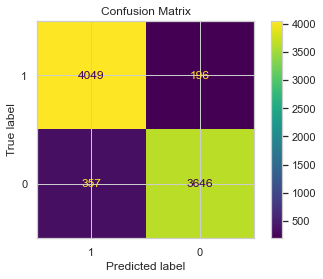

In [67]:
from sklearn.metrics import plot_confusion_matrix
class_names = {1:"Success",0:"Failure"}
disp = plot_confusion_matrix(best_fit, col_transformer_derived.transform(X_test), y_test,display_labels=class_names,)
disp.ax_.set_title("Confusion Matrix")
plt.show()

#####  Custom Stacking classifier:

In [ ]:
# def custom_ensemble(X_train, y_train, X_test, y_test, n_estimators, hyperparams):
#         """
#         This function receives information for n_estimators to be trained, the data to be used on training and other
#         parameters for fitting the model to the data.

#         Parameters
#         ----------
#         :param X_train: object containing features [type: df]
#         :param y_train: object containing target variable [type: df]
#         :param X_test: object containing features for testing the model [type: df]
#         :param y_test: Actual target varaible used testing the model [type: df]
#         :param n_estimators: list of estimators taht should be trained [type: list]
#         :param hyperparams: dictionary containing estimators and hyperparameters inner dict [type: dict]
#         Return
#         ------
#         This method  returns meta classifer prediction
        
#         """
#         X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size=.5,random_state=RANDOM_SEED)
        
#         D1 = pd.concat([X_base,y_base],axis=1)
#         D2 = pd.concat([X_meta,y_meta],axis=1)
#         d1 = D1.sample(replace=True,frac =.40)
#         d2 = D1.sample(replace=True,frac =.40)
#         d3 = D1.sample(replace=True,frac =.40)
#         k_samples = [d1,d2,d3]
#         base_learners_prediction = []
#         best_estimators = []
        
        
#         for sample, estimator, param in zip(k_samples,base_learners,list(hyperparams.keys())):
#             X_sample = sample[features]
#             y_sample = sample['target_encode']
#             num_columns_derived = ['approx_cost(for two people)']
#             cat_columns_derived = ['online_order', 'book_table', 
#                    'location', 'rest_type',  'cuisines',
#                    'city']
#             ############################################################################################################################# 


#             #setting the pipes for the transformation 
#             categorical_pipe = Pipeline([('get_dummies',TargetEncoder(handle_unknown='value'))])
#             numeric_pipe = Pipeline([('scaling',StandardScaler())])

#             # set up columnTransformer
#             col_transformer_derived = ColumnTransformer(
#                                 transformers=[
#                                     ('cat', categorical_pipe, cat_columns_derived), ('num', numeric_pipe, num_columns_derived)
#                                 ],
#                                 remainder='passthrough',
#                                 n_jobs=-1
#                                 )


#             ##########################################################################################################################
#             X_sample = col_transformer_derived.fit_transform(X_sample,y_sample) 
#             #base_learner.fit(X_sample,y_sample)
#             print(estimator)
#             print(hyperparams[param])
#             model = RandomizedSearchCV(estimator, hyperparams[param], cv = 3)
#             model.fit(X_sample, y_sample)
#             best_estimators.append(model.best_estimator_)
#             y_pred = model.predict(col_transformer_derived.transform(X_meta)).tolist()
#             base_learners_prediction.append(y_pred)
#         base_learners_prediction = pd.DataFrame(base_learners_prediction,index =['RF', 'LR', 'DT']).T
#         base_learners_prediction['True_Label'] = D2['target_encode'].tolist()

#     # Metaclassifier training and prediction

#         meta_classifier = lgb.LGBMClassifier(seed=RANDOM_SEED).fit(base_learners_prediction.drop(['True_Label'],axis=1),base_learners_prediction['True_Label'])
#         base_learners_prediction_test_set = []
#         for sample, base_learner in zip(X_test,best_estimators):
#             X_base_test = X_test[features]
#             y_pred = base_learner.predict(col_transformer_derived.transform(X_test)).tolist()
#             base_learners_prediction_test_set.append(y_pred)
#         base_learners_prediction_test_set = pd.DataFrame(base_learners_prediction_test_set,index =['RF', 'LR', 'DT']).T
#         base_learners_prediction_test_set['True_Label'] = y_test.tolist()
#         y_pred = meta_classifier.predict(base_learners_prediction_test_set[['RF', 'LR', 'DT']])

        
#         return y_pred

In [18]:
def custom_ensemble(X_train, y_train, X_test, y_test, n_estimators):
        """
        This function receives information for n_estimators to be trained, the data to be used on training and other
        parameters for fitting the model to the data.

        Parameters
        ----------
        :param X_train: object containing features [type: df]
        :param y_train: object containing target variable [type: df]
        :param X_test: object containing features for testing the model [type: df]
        :param y_test: Actual target varaible used testing the model [type: df]
        :param n_estimators: no of estimators to be trained
        Return
        ------
        This method  returns meta classifer prediction
        
        """
        X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size=.5,random_state=RANDOM_SEED)
        
        D1 = pd.concat([X_base,y_base],axis=1)
        D2 = pd.concat([X_meta,y_meta],axis=1)
#         d1 = D1.sample(replace=True,frac =.40)
#         d2 = D1.sample(replace=True,frac =.40)
#         d3 = D1.sample(replace=True,frac =.40)
#         k_samples = [d1,d2,d3]
        base_learners_prediction = []
        listofAllModels = []
        
        
        for estimator in  (range(n_estimators)):
            sample = D1.sample(replace=True,frac =.40)
            X_sample = sample[features]
            y_sample = sample['target_encode']
            num_columns_derived = ['approx_cost(for two people)']
            cat_columns_derived = ['online_order', 'book_table', 
                   'location', 'rest_type',  'cuisines',
                   'city']
            ############################################################################################################################# 


            #setting the pipes for the transformation 
            categorical_pipe = Pipeline([('get_dummies',TargetEncoder(handle_unknown='value'))])
            numeric_pipe = Pipeline([('scaling',StandardScaler())])

            # set up columnTransformer
            col_transformer_derived = ColumnTransformer(
                                transformers=[
                                    ('cat', categorical_pipe, cat_columns_derived), ('num', numeric_pipe, num_columns_derived)
                                ],
                                remainder='passthrough',
                                n_jobs=-1
                                )


            ##########################################################################################################################
            X_sample = col_transformer_derived.fit_transform(X_sample,y_sample) 
            model = RandomForestClassifier(random_state=RANDOM_SEED)
            model.fit(X_sample, y_sample)
            listofAllModels.append(model)
            y_pred = model.predict(col_transformer_derived.transform(X_meta)).tolist()
            base_learners_prediction.append(y_pred)
        base_learners_prediction = pd.DataFrame(base_learners_prediction).T
        base_learners_prediction['True_Label'] = D2['target_encode'].tolist()

    # Metaclassifier training and prediction

        meta_classifier = lgb.LGBMClassifier(seed=RANDOM_SEED).fit(base_learners_prediction.drop(['True_Label'],axis=1),base_learners_prediction['True_Label'])
        base_learners_prediction_test_set = []
        for sample, base_learner in zip(X_test,listofAllModels):
            X_base_test = X_test[features]
            y_pred = base_learner.predict(col_transformer_derived.transform(X_test)).tolist()
            base_learners_prediction_test_set.append(y_pred)
        base_learners_prediction_test_set = pd.DataFrame(base_learners_prediction_test_set).T
        base_learners_prediction_test_set['True_Label'] = y_test.tolist()
        y_pred = meta_classifier.predict(base_learners_prediction_test_set.drop(['True_Label'],axis=1))

        
        return y_pred, meta_classifier,base_learners_prediction_test_set

In [ ]:
# def CreateAlistofAllModels(list_input_data, list_output_data, n_estimator):
#     listofAllModels = []
#     for i in tqdm(range(n_estimator)):
#         model = DecisionTreeRegressor()
#         model.fit(list_input_data[i], list_output_data[i])
#         listofAllModels.append(model)
#     gc.collect()
#     return listofAllModels

In [19]:
RANDOM_SEED = 42
features = ['online_order', 'book_table',
       'location', 'rest_type',  'cuisines',
       'approx_cost(for two people)','city']
df['target_encode'] = np.where(df.target=="Sucess", 1, 0)
X = df[features]
y = df['target_encode']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=RANDOM_SEED)

#Define the estimators and corresponding search space
estimators = [RandomForestClassifier(random_state=RANDOM_SEED),
                         LogisticRegression(random_state=RANDOM_SEED)]
# hyperparams = {
    
#        "rf": {
#          'max_features': ['auto', 'sqrt'],
#          'min_samples_split': [5, 10, 15],
#          'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 600, num = 10)]},
    
#      "lr":{'C': np.logspace(-1, 8, 10)},
    
#     "dt" : {
#               "max_features": randint(1, 9),
#               "min_samples_leaf": randint(1, 9),
#               "criterion": ["gini", "entropy"]}

#                 }

y_pred,meta_classifier,base_learners_prediction_test_set = custom_ensemble(X_train,y_train,X_test, y_test,3)

In [21]:
meta_performance = {}
meta_performance['model'] = []
meta_performance['precision'] = []
meta_performance['recall'] = []
meta_performance['f1'] = []
meta_performance['auc'] = []
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
meta_performance['model'].append("Meta Classifier-LGBM")
meta_performance['precision'].append(round(precision, 3))
meta_performance['recall'].append(round(recall, 3))
meta_performance['f1'].append(round(f1, 3))
meta_performance['auc'].append(round(auc, 3))

In [22]:
performance_metrics_custom = pd.DataFrame(meta_performance)
performance_metrics = pd.concat([performance_metrics,performance_metrics_custom],axis=0)
performance_metrics.reset_index(drop=True).style.background_gradient(cmap='Blues')

,model,precision,recall,f1,auc,cv_auc
0,Logistic Regresion,0.835000,0.724000,0.775000,0.813000,0.887000
1,Random Forest,0.947000,0.893000,0.919000,0.929000,0.962000
2,Xgboost,0.863000,0.697000,0.771000,0.810000,0.886000
3,Decision Tree,0.950000,0.928000,0.939000,0.947000,0.931000
4,LightGBM,0.844000,0.679000,0.753000,0.796000,0.877000
5,Random Forest,0.952000,0.898000,0.924000,0.933000,nan
6,Meta Classifier-LGBM,0.810000,0.701000,0.752000,0.794000,nan


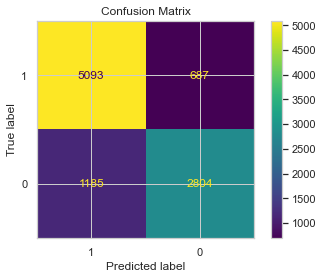

In [41]:
from sklearn.metrics import plot_confusion_matrix
class_names = {1:"Success",0:"Failure"}
disp = plot_confusion_matrix(meta_classifier, base_learners_prediction_test_set.drop(['True_Label'],axis=1), y_test,display_labels=class_names,)
disp.ax_.set_title("Confusion Matrix")
plt.show()

#### Feature Importance : 
Below plot shows top 5  feature  importance for one of the base learner Random Forest. We can see book_table been top feature for predicting success of a reaturant.

<AxesSubplot:>

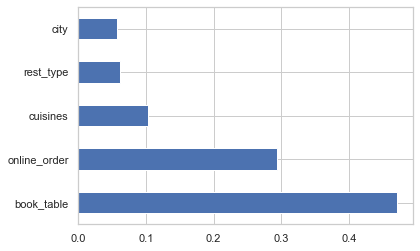

In [238]:
feat_importances = pd.Series(base_learners[0].feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

### Final Models

In [25]:
performance_metrics.reset_index(drop=True).style.background_gradient(cmap='Blues')#.reset_index()
#5 th Random forest is hyper parameter tuned with additional features engineered

,model,precision,recall,f1,auc,cv_auc
0,Logistic Regresion,0.835000,0.724000,0.775000,0.813000,0.887000
1,Random Forest,0.947000,0.893000,0.919000,0.929000,0.962000
2,Xgboost,0.863000,0.697000,0.771000,0.810000,0.886000
3,Decision Tree,0.950000,0.928000,0.939000,0.947000,0.931000
4,LightGBM,0.844000,0.679000,0.753000,0.796000,0.877000
5,Random Forest,0.952000,0.898000,0.924000,0.933000,nan
6,Meta Classifier-LGBM,0.810000,0.701000,0.752000,0.794000,nan


In [45]:
import joblib
joblib.dump(value=best_fit, filename='model.pkl')
joblib.dump(value=col_transformer_derived, filename='pipeline.pkl')

['pipeline.pkl']

#### Productionalizing final function

In [70]:
def final_model(X):
#preprocess data i.e data cleaning, filling missing values etc
    test = pd.DataFrame(X)
    #compute features based on this X
    test['total_cuisines'] = test.cuisines.map(lambda x: [i.strip() for i in str(x).split(",")]).apply(len)
    test['multi_type_restuarant'] = test.rest_type.map(lambda x: [i.strip() for i in str(x).split(",")]).apply(len)
    #use pre trained model
    model = joblib.load('model.pkl')
    pipeline = joblib.load('pipeline.pkl')
    y_pred = model.predict(pipeline.transform(test)) 
    y_pred_corrected = np.where(y_pred==1,"Success","Failure")
    return y_pred_corrected


In [71]:
test = [{"online_order":"No","book_table":"Yes","location":"HSR","rest_type":"Fine Dining"\
      ,"cuisines":"Asian,European","approx_cost(for two people)":800,"city":"BTM"}]
final_model(test)

array(['Success'], dtype='<U7')